# CSE 252A Computer Vision I Fall 2019 - Homework 2
### Instructor: Ben Ochoa
### Assignment Published On: Tuesday, October 8, 2019
### Due On: Tuesday, October 22, 2019 11:59 pm

## Instructions
* Review the academic integrity and collaboration policies on the course website.
* This assignment must be completed individually.
* All solutions must be written in this notebook
* Programming aspects of this assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you can do so. This has been provided just to provide you with a framework for the solution.
* You may use python packages for basic linear algebra (you can use numpy or scipy for basic operations), but you may not use packages that directly solve the problem.
* If you are unsure about using a specific package or function, then ask the instructor and teaching assistants for clarification.
* You must submit this notebook exported as a pdf. You must also submit this notebook as .ipynb file.
* You must submit both files (.pdf and .ipynb) on Gradescope. You must mark each problem on Gradescope in the pdf.
* It is highly recommended that you begin working on this assignment early.
* **Late policy - Assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances.**

## Problem 1: Perspective Projection and Homogenous Coordinates [10 pts]
### Part 1 [5 pts]
Consider a perspective projection where a point 
$$
P = [\text{x y z}]^T
$$
is projected onto an image plane $\Pi'$ represented by $k = f'>0$ as shown in the following figure.
![title](fig1.png)

The first second and third coordinate axes are denoted by $i$, $j$, $k$ respectively. 

Consider the projection of two rays in the world coordinate system
$$
Q1 = [\text{7 -3 1}] + t[\text{8 2 4}]
$$
$$
Q2 = [\text{2 -5 9}] + t[\text{8 2 4}]
$$
where $-\infty \leq t \leq -1$. 

Calculate the coordinates of the endpoints of the projection of the rays onto the image plane. Identify the vanishing point based on the coordinates.  
  
### Part 2 [3 pts]
Prove that all parallel lines have the same vanishing point.  

### Part 3 [2 pts]
Show that the use of homogenous coordinates can convert an affine transformation into that of a linear one. Recall that an affine transformation of any vector x is described by Ax + b.

## Part 1 Solution
#### Answer : By equation of Perspective Projection, if in a world coordinate point P = (x,y,z), then the intersection of OP wiht the plane would be $ (-f'\frac{x}{z}, -f'\frac{y}{z}, -f')$ under Cartesian coordinates. To make it into the image plane coordinate, the point would be $(-f'\frac{x}{z}, -f'\frac{y}{z})$ in the homogenoeus coordinate.

#### the two parallel rays $$Q1:[7, 3, 1] + t[8, 2, 4]$$ $$Q2: [2, -5, 9] + t[8,2,4]$$ , where $-\infty \leq t \leq -1 $we can know that intersection points of two rays on the image plane are :$$ Q1:(-f'\frac{7+8t}{1+4t},-f'\frac{-3+2t}{1+4t})$$ $$ Q2:(-f'\frac{2+8t}{9+4t},-f'\frac{-5+2t}{9+4t})$$  , The vanishing point would be the same given two rays, thus we have $Q1 = Q2$, we can have two equatios $$ Equaition 1 :(7+8t)(1+4t) = (2+8t)(9+4t) $$  $$ Equation 2 :(-3+2t)(1+4t) = (-5+2t)(9+4t) $$ Divide equation 1 by 2: $$\frac{(7+8t)(9+4t)}{(-3+2t)(9+4t)} = \frac{(2+8t)(1+4t)}{(-5+2t)(1+4t)} $$ $$ t = \frac{-29}{-6} $$ Therefore, we can have vanishing is $$(-\frac{85}{31},-\frac{19}{31}) $$ on the image plane.

## Part2 Solution
#### Let   $$line1: Ax+By+C = 0$$  $$line2: Ax+By+D = 0$$   be two parallel linea in Euclidean coordinate. We can convert them into homogeneous coordinate by $(x = \frac{x}{w}, y = \frac{y}{w})$, then the equation would be $$A\frac{x}{w} + B\frac{y}{w} + C = 0 $$ $$A\frac{x}{w} + B\frac{y}{w} + D =0 $$ We can see that $(x,y,0)$ satisties both equations. Divide the (x,y,0) by 0 to transform it into Euclidean coordinate system and this point will be the vanishing point. If two parallel line works, then we can induce that all parallel lines would have the same vanishing points.                                                                           

## Part3 Solution
#### Let a vector (x,y,z) be a point in the world cooridnate. we can make the point into homogeneous coordinates to be (x,y,z,1). We know that linear transformation could not express translation. However we can use a 4x4 transformation matrix to replace transformation form with AX instead of AX+b. Therefore, with the usage of homogeneous cooridnate, we can make affine transformation into linear transformation.

## Problem 2: Image Formation and Rigid Body Transformations [10 points]

In  this  problem  we  will  practice  rigid  body  transformations  and  image  formations  through  the projective camera model. The goal will be to photograph the following four points 
$$^AP_1 = [\text{-1 -0.5 2}]^T$$,  $$^AP_2 = [\text{1 -0.5 2}]^T$$, $$^AP_3 = [\text{1 0.5 2}]^T$$, $$^AP_4 = [\text{-1 0.5 2}]^T$$

To do this we will need two matrices.  Recall, first, the following formula for rigid body transformation
$$
^BP = \text{ } ^B_AR\text{ }^AP + \text{ } ^BO_A
$$
Where $^BP$ is the point coordinate in the target ($B$) coordinate system. $^AP$ is the point coordinate in the source ($A$) coordinate system. $^B_AR$ is the rotation matrix from $A$ to $B$, and $^BO_A$ is the origin of the coordinate system $A$ expressed in $B$ coordinates. 

The rotation and translation can be combined into a single 4 $\times$ 4 extrinsic parameter matrix, $P_e$, so that $^BP = P_e \cdot \text{ }^AP$.

Once transformed, the points can be photographed using the intrinsic camera matrix, $P_i$ which is a 3 $\times$ 4 matrix.

Once these are found, the image of a point, $^AP$, can be calculated as $P_i \cdot P_e \cdot \text{ }^AP$.

We will consider four different settings of focal length, viewing angles and camera positions below. For each of these calculate:

a) Extrinsic transformation matrix,

b) Intrinsic camera matrix under the perspective camera assumption.

c) Calculate the image of the four vertices and plot using the supplied functions

Your output should look something like the following image (Your output values might not match, this is just an example)


![Sample Plots](new.png)

1. [No rigid body transformation]. Focal  length  =  1. The  optical  axis  of  the  camera  is aligned with the z-axis.
2. [Translation]. $^BO_A = [\text{0 0 1}]^T$. Focal length = 1. The optical axis of the camera is aligned with the z-axis.
3. [Translation and Rotation]. Focal length = 1. $^B_AR$ encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis. $^BO_A = [\text{0 0 1}]^T$.
4. [Translation and Rotation, long distance]. Focal length = 5. $^B_AR$ encodes a 30 degrees around the z-axis and then 60 degrees around the y-axis. $^BO_A = [\text{0 0 13}]^T$.

> You can refer the Richard Szeliski starting page 36 for image formation and the extrinsic matrix.

> Intrinsic matrix calculation for perspective camera models was covered in class and can be referred in slide 2  
https://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec2.pdf  
> You can also refer lecture 3 of the previous year's course as well for further information if you wish!  
http://cseweb.ucsd.edu/classes/fa18/cse252A-a/lec3.pdf 

We will not use a full intrinsic camera matrix (e.g.  that maps centimeters to pixels, and defines  the  coordinates  of  the  center  of  the  image),  but  only  parameterize  this  with $f$,  the  focal
length.  In other words:  the only parameter in the intrinsic camera matrix under the perspective assumption is $f$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# convert points from euclidian to homogeneous
def to_homog(points): #here always remember that points is a 3x4 matrix
    '''
    input: points_euclidian[3x4]
    return: homogeneous[4x4]
    '''
    # write your code here
    ones = np.ones(points.shape[1])
    return np.vstack((points,ones))
    
# convert points from homogeneous to euclidian
def from_homog(points_homog):
    '''
    input: points_homogenous
    return: points_euclid
    '''
    # write your code here
    points_euclid = points_homog/ points_homog[-1][:]
    points_euclid = points_euclid[:-1]
    return points_euclid
    
# project 3D euclidian points to 2D euclidian
def project_points(P_int, P_ext, pts):
    '''
    Args:
        input: pts_3d_euclid[3x4]
        return: pts_2d_euclid[2x4]
    '''
    # write your code here
    pts_hom_3d = to_homog(pts)
    conv_matrix = np.hstack((np.identity(3),np.zeros((3,1))))
    tmp = np.matmul(P_int,conv_matrix)
    pts_final = np.matmul(np.matmul(tmp,P_ext),pts_hom_3d)
    return from_homog(pts_final)

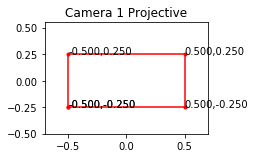

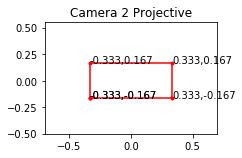

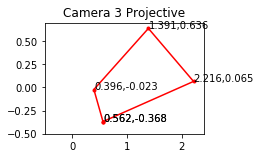

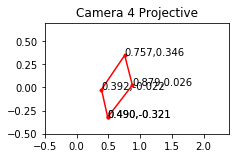

In [379]:
# Change the three matrices for the four cases as described in the problem
# in the four camera functions geiven below. Make sure that we can see the formula
# (if one exists) being used to fill in the matrices. Feel free to document with
# comments any thing you feel the need to explain. 

def camera1():
    # write your code here
    theta = np.radians(0)
    c, s = np.cos(theta), np.sin(theta)
    P_int_proj = np.identity(3)
    P_ext = np.array([[c,-s,0,0],[s,c,0,0],[0,0,1,0],[0,0,0,1]])
    return P_int_proj, P_ext

def camera2():
    # write your code here
    theta = np.radians(0)
    c, s = np.cos(theta), np.sin(theta)
    P_int_proj = np.identity(3)
    P_ext = np.array([[c,-s,0,0],[s,c,0,0],[0,0,1,1],[0,0,0,1]])
    return P_int_proj, P_ext

def camera3():
    # write your code here
    theta_z = np.radians(30)
    theta_y = np.radians(60)
    c_z, s_z = np.cos(theta_z), np.sin(theta_z)
    c_y, s_y = np.cos(theta_y), np.sin(theta_y)
    P_int_proj = np.identity(3)
    z = np.zeros(3)
    Rz = np.array([[c_z,-s_z,0],[s_z,c_z,0],[0,0,1]])
    Ry = np.array([[c_y,0,s_y],[0,1,0],[-s_y,0,c_y]])
    P_ext = np.matmul(Ry,Rz)
    O = np.array([[0,0,1]]).T
    P_ext = np.hstack((P_ext,O))
    P_ext = np.vstack((P_ext,np.array([0,0,0,1])))
    return P_int_proj, P_ext

def camera4():    
    # write your code here
    theta_z = np.radians(30)
    theta_y = np.radians(60)
    c_z, s_z = np.cos(theta_z), np.sin(theta_z)
    c_y, s_y = np.cos(theta_y), np.sin(theta_y)
    P_int_proj = np.identity(3)
    P_int_proj[-1][-1] = P_int_proj[-1][-1] / 5
    z = np.zeros(3)
    Rz = np.array([[c_z,-s_z,0],[s_z,c_z,0],[0,0,1]])
    Ry = np.array([[c_y,0,s_y],[0,1,0],[-s_y,0,c_y]])
    P_ext = np.matmul(Ry,Rz)
    O = np.array([[0,0,13]]).T
    P_ext = np.hstack((P_ext,O))
    P_ext = np.vstack((P_ext,np.array([0,0,0,1])))
    return P_int_proj, P_ext

# Use the following code to display your outputs
# You are free to change the axis parameters to better 
# display your quadrilateral but do not remove any annotations

def plot_points(points, title='', style='.-r', axis=[]):
    inds = list(range(points.shape[1]))+[0]
    plt.plot(points[0,inds], points[1,inds],style)
    
    for i in range(len(points[0,inds])):
        plt.annotate(str("{0:.3f}".format(points[0,inds][i]))+","+
                     str("{0:.3f}".format(points[1,inds][i])),
                     (points[0,inds][i], points[1,inds][i]))
    
    if title:
        plt.title(title)
    if axis:
        plt.axis(axis)
        
    plt.tight_layout()
        
def main():
    point1 = np.array([[-1,-.5,2]]).T
    point2 = np.array([[1,-.5,2]]).T
    point3 = np.array([[1,.5,2]]).T
    point4 = np.array([[-1,.5,2]]).T 
    points = np.hstack((point1,point2,point3,point4))
    
    for i, camera in enumerate([camera1, camera2, camera3, camera4]):
    #for i, camera in enumerate([camera1]):

        P_int_proj, P_ext = camera()
        plt.subplot(2, 2, i+1)
        if 0<=i <2:
            plot_points(project_points(P_int_proj, P_ext, points), 
                        title='Camera %d Projective'%(i+1), 
                        axis=[-0.7,0.7,-0.5,0.55])
        else:
            plot_points(project_points(P_int_proj, P_ext, points), 
                        title='Camera %d Projective'%(i+1), 
                        axis=[-0.5,2.4,-0.5,0.7])
        plt.show()

main()

## Problem 3: Homography [12 pts]

Consider a vision application in which components of the scene are replaced by components from another image scene. 

In this problem, we will implement partial functionality of a smartphone camera scanning application (Example: CamScanner) that, in case you've never used before, takes pictures of documents and transforms it by warping and aligning to give an image similar to one which would've been obtained through using a scanner.

The transformation can be visualized by imagining the use of two cameras forming an image of a scene with a document. The scene would be the document you're trying to scan placed on a table and one of the cameras would be your smart phone camera, forming the image that you'll be uploading and using in this assignment. There can also be an ideally placed camera, oriented in the world in such a way that the image it forms of the scene has the document perfectly algined. While it is unlikely you can hold your phone still enough to get such an image, we can use homography to transform the image you take into the image that the ideally placed camera would have taken.

This digital replacement is accomplished by a set of corresponding points for the document in both the source (your picture) and target (the ideal) images. The task then consists of mapping the points from the source to their respective points in the target image. In the most general case, there would be no constraints on the scene geometry, making the problem quite hard to solve. If, however, the scene can be approximated by a plane in 3D, a solution can be formulated much more easily even without the knowledge of camera calibration parameters. 

To solve this section of the homework, you will begin by understanding the transformation that maps one image onto another in the planar scene case. Then you will write a program that implements this transformation and use it to warp some document into a well aligned document (See the given example to understand what we mean by well aligned).



To begin with, we consider the projection of planes in images. imagine two cameras $C_1$ and $C_2$ looking at a plane $\pi$ in the world. Consider a point $P$ on the plane $\pi$ and its projection $p=[\text{u1, v1, 1}]^T$ in the image 1 and $q=[\text{u2, v2, 1}]^T$ in image 2.

There exists a unique, upto scale, 3 $\times$ 3 matrix $H$ such that, for any point $P$:
$$q \approx Hp$$
Here $\approx$ denotes equality in homogeneous coordinates, meaning that the left and right hand sides are proportional. Note that $H$ only depends on the plane and the projection matrices of the two cameras.

The interesting thing about this result is that by using $H$ we can compute the image of $P$ that would be seen in the camera with center $C_2$ from the image of the point in the camera with center at $C_1$, without knowing the three dimensional location. Such an $H$ is a projective transformation of the plane, called a homography.

In this problem, complete the code for computeH and warp functions that can be used in the skeletal code that follows. 

There are three warp functions to implement in this assignment, example ouputs of which are shown below. In warp1, you will create a homography from points in your image to the target image (Mapping source points to target points). In warp2, the inverse of this process will be done. In warp3, you will create a homography between a given image and your image, replacing your document with the given image.

1. ![title](forward.png) 
2. ![title](inverse.png)  
3. ![](backward.png)  

1. In the context of this problem, the source image refers to the image of a document you take that needs to be replaced into the target. 
2. The target image can start out as an empty matrix that you fill out using your code.
3. You will have to implement the computeH function that computes a homography. It takes in exactly four point correspondences between the source image and target image in homogeneous coordinates respectively and returns a 3 $\times$ 3 homography matrix.
4. You will also have to implement the three warp functions in the skeleton code given and plot the resultant image pairs. For plotting, make sure that the target image is not smaller than the source image.

Note: We have provided test code to check if your implementation for computeH is correct. All the code to plot the results needed is also provided along with the code to read in the images and other data required for this problem. Please try not to modify that code. 

You may find following python built-ins helpful:
numpy.linalg.svd, numpy.meshgrid

(322, 429, 3)


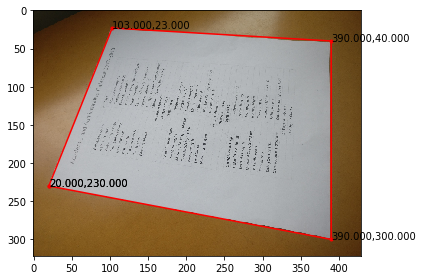

(322, 429, 3)


In [203]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# load image to be used - resize to make sure it's not too large
# You can use the given image as well
# A large image will make testing you code take longer; once you're satisfied with your result,
# you can, if you wish to, make the image larger (or till your computer memory allows you to)

#source_image = Image.open("ucsd_logo.png")

source_image = Image.open("photo.jpg")
s1 , s2 = source_image.size
ratio = 5
s1 = int(s1/ratio)
s2 = int(s2 / ratio)
source_image = source_image.resize((s1,s2))
source_image_paper = np.array(source_image)/255
#source_image = source_image.resize((s1,s2))
source_image = np.array(source_image)/255
source_image = source_image[:,:,:3]
print(source_image.shape)

# display images
plt.imshow(source_image)

# Align the polygon such that the corners align with the document in your picture
# This polygon doesn't need to overlap with the edges perfectly, an approximation is fine
# The order of points is clockwise, starting from bottom left.
#x_coords = [105,1960,1940,500] 
#y_coords = [1150,1500,200,130]
target_points = np.array([[230,20],[300,390],[40,390],[23,103]]).T
x_coords = [20,390,390,103] 
y_coords = [230,300,40,23]

# Plot points from the previous problem is used to draw over your image 
# Note that your coordinates will change once you resize your image again
source_points = np.vstack((x_coords, y_coords))
plot_points(source_points)

plt.show()
print (source_image.shape)

H1_left: [[0.  1.  1. ]
 [0.5 0.5 1.5]
 [1.  1.  1. ]]
lamb1:  [ 1. -1.  1.]
H_mtx
[[1.]
 [0.]]


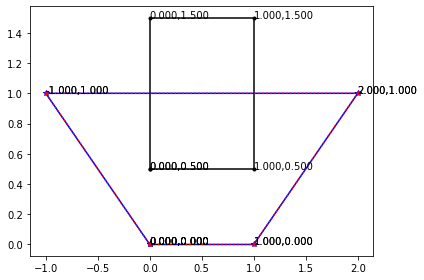

The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.


In [51]:
from numpy.linalg import inv
def computeH(source_points, target_points):
    # returns the 3x3 homography matrix such that:
    # np.matmul(H, source_points) = target_points
    # where source_points and target_points are expected to be in homogeneous
    # make sure points are 3D homogeneous
    assert source_points.shape[0]==3 and target_points.shape[0]==3
    #Your code goes here
    #s = np.array([[105,1960,1940,500],[1150,1500,200,130],[1,1,1,1]])
    #t = np.array([[0,0,250,250],[0,400,400,0],[1,1,1,1]])
    H_mtx = np.zeros((3,3)) #Fill in the H_mtx with appropriate values.
    '''
    print("source points:", source_points)
    print("target points:", target_points)
    import cv2
    print("by findHomography")
    cv2.findHomography(source_points,target_points)
    
    tmp = inv(np.matmul(source_points, source_points.T))
    H_mtx = np.matmul(target_points,source_points.T)
    H_mtx = np.matmul(H_mtx, tmp)
    H_mtx = inv(H_mtx)
    '''
    H1_left = source_points[:,:3]
    H1_right = source_points[:,-1]
    lamb1 = np.matmul(inv(H1_left),H1_right)
    H1_inv = lamb1*H1_left
    H2_left = target_points[:,:3]
    H2_right = target_points[:,-1]
    lamb2 = np.matmul(inv(H2_left),H2_right)
    H2_inv = lamb2*H2_left  
    H_mtx = np.matmul(H2_inv,inv(H1_inv))
    #H_mtx = np.linalg.solve(target_points[:][:2],source_points[:][:2])
    #print(np.allclose(np.dot(source_points, H_mtx), target_points))
    return  H_mtx

#######################################################
# test code. Do not modify
#######################################################
def test_computeH():
    source_points = np.array([[0,0.5],[1,0.5],[1,1.5],[0,1.5]]).T
    target_points = np.array([[0,0],[1,0],[2,1],[-1,1]]).T
    H = computeH(to_homog(source_points), to_homog(target_points))
    mapped_points = from_homog(np.matmul(H,to_homog(source_points)))
    print (from_homog(np.matmul(H,to_homog(source_points[:,1].reshape(2,1)))))

    plot_points(source_points,style='.-k')
    plot_points(target_points,style='*-b')
    plot_points(mapped_points,style='.:r')
    plt.show()
    print('The red and blue quadrilaterals should overlap if ComputeH is implemented correctly.')
test_computeH()

H1_left: [[230. 300.  40.]
 [ 20. 390. 390.]
 [  1.   1.   1.]]
lamb1:  [ 0.77567568 -0.63222453  0.85654886]
H_mtx
original points:  [[230 300  40  23]
 [ 20 390 390 103]]
mapped_points:  [[  0 400 400   0]
 [  0   0 300 300]]
M = 400, N = 300


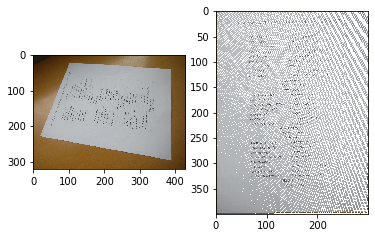

In [210]:
def warp(source_img, source_points, target_size):
    # Create a target image and select target points to create a homography from source image to target image,
    # in other words map all source points to target points and then create
    # a warped version of the image based on the homography by filling in the target image.
    # Make sure the new image (of size target_size) has the same number of color channels as source image
    assert target_size[2]==source_img.shape[2]
    #Your code goes here
    M,N = target_size[0],target_size[1]
    target_img = np.ones(target_size)
    target_points = np.array([[0,0],[M,0],[M,N],[0,N]]).T
    H = computeH(to_homog(source_points), to_homog(target_points))
    mapped_points = np.array(from_homog(np.matmul
                            (H,to_homog(source_points))),dtype = 'int')
    
    for i in range(source_img.shape[0]):
        for j in range(source_img.shape[1]):
            source_p = np.array([[i,j]]).T
            mapped_point = np.array(from_homog
                        (np.matmul(H,to_homog(source_p))),dtype = 'int')
            i_new, j_new = mapped_point[0][0], mapped_point[1][0]
            if 0 <= i_new < M and 0 <= j_new < N:
                target_img[i_new][j_new] = source_img[i][j]
    
    return target_img

# Use the code below to plot your result
source_image = Image.open("photo.jpg")
s1 , s2 = source_image.size
ratio = 5
s1 = int(s1/ratio)
s2 = int(s2 / ratio)
source_image = source_image.resize((s1,s2))
source_image_paper = np.array(source_image)/255

source_points = np.array([[230,20],[300,390],[40,390],[23,103]]).T
result = warp(source_image_paper, source_points, (400,300,3)) 
#Choose appropriate target size

plt.subplot(1, 2, 1)
plt.imshow(source_image_paper)
plt.subplot(1, 2, 2)
plt.imsave("myop.png",result)
plt.imshow(result)
plt.show()


The output of warp1 of your code probably has some striations or noise. The larger you make your target image, the less it will resemble the document in the source image. Why is this happening? 

#### Answer: In warp1, since we map source image to the document, if the desired output image is larger, then there must be some pixels lacking corresponding pre-mapped pixel in source image. That is why there are striation. Ans also why the larger the document is , more noise would be occured. 

To fix this, implement warp2, by creating an inverse homography matrix and fill in the target image.

H1_left: [[0.0e+00 1.2e+03 1.2e+03]
 [0.0e+00 0.0e+00 8.0e+02]
 [1.0e+00 1.0e+00 1.0e+00]]
lamb1:  [ 1. -1.  1.]
H_mtx
H_reverse:  [[ 9.38496188e-03 -1.94256757e-01  1.78405405e+02]
 [ 1.92545045e-01  1.09358108e-01  1.55135135e+01]
 [-1.19542620e-04  2.80405405e-04  7.75675676e-01]]
original points:  [[   0 1200 1200    0]
 [   0    0  800  800]]
mapped_points:  [[230 300  39  22]
 [ 20 390 390 103]]
M = 1200, N = 800


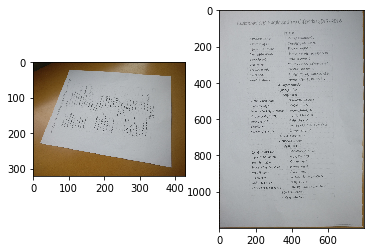

In [192]:
def warp2(source_img, source_points, target_size):
    # Create a target image and select target points to create a homography from target image to source image,
    # in other words map each target point to a source point, and then create a warped version
    # of the image based on the homography by filling in the target image.
    # Make sure the new image (of size target_size) has the same number of color channels as source image
    
    #Your code goes here
    
    M,N = target_size[0],target_size[1]
    s1,s2 = source_img.shape[0], source_img.shape[1]
    target_img = np.zeros(target_size)
    target_points = np.array([[0,0],[M,0],[M,N],[0,N]]).T
    H_reverse = computeH(to_homog(target_points), to_homog(source_points))
    mapped_points = np.array(from_homog(np.matmul
                     (H_reverse,to_homog(target_points))),dtype = 'int')
    for i in range(M):
        for j in range(N):
            source_p = np.array([[i,j]]).T
            mapped_point = np.array(from_homog(np.matmul
                          (H_reverse,to_homog(source_p))),dtype = 'int')
            i_new, j_new = mapped_point[0][0], mapped_point[1][0]
            if 0 <= i_new < s1 and 0 <= j_new < s2:
                target_img[i][j] = source_img[i_new][j_new]
    
    return target_img

# Use the code below to plot your result
source_image = Image.open("photo.jpg")
s1 , s2 = source_image.size
ratio = 5
s1 = int(s1/ratio)
s2 = int(s2 / ratio)
source_image = source_image.resize((s1,s2))
source_image_paper = np.array(source_image)/255

source_points = np.array([[230,20],[300,390],[40,390],[23,103]]).T
result = warp2(source_image_paper, source_points, (1200,800,3)) 
#Choose appropriate size
plt.subplot(1, 2, 1)
plt.imshow(source_image_paper)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.imsave("warp2.png",result)
plt.show()

Try playing around with the size of your target image in warp1 versus in warp2, additionally you can also implement nearest pixel interpolation or bi-linear interpolations and see if that makes a difference in your output.

In warp3, you'll be replacing the document in your image with a provided image. Read in "ucsd_logo.png" as the source image, keeping your document as the target. 

(200, 200)
H1_left: [[230. 300.  40.]
 [ 20. 390. 390.]
 [  1.   1.   1.]]
lamb1:  [ 0.77567568 -0.63222453  0.85654886]
H_mtx
H_reverse:  [[ 3.18646779e-01  7.94697388e-01 -8.91827069e+01]
 [-8.98058252e-01  1.69902913e-01  2.03155340e+02]
 [ 1.59323389e-03  4.89166383e-04  9.12971483e-01]]
original points:  [[230 300  40  23]
 [ 20 390 390 103]]
mapped_points:  [[  0 200 200   0]
 [  0   0 200 200]]
M = 322, N = 429


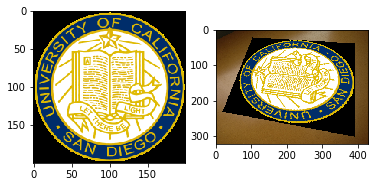

In [211]:
# Load the given UCSD logo image
def warp3(target_image, target_points, source_image):
    #Your code goes here
    M,N = target_image.shape[0],target_image.shape[1]
    s1,s2 = source_image.shape[0], source_image.shape[1]
    source_points = np.array([[0,0],[s1,0],[s1,s2],[0,s2]]).T
    H_reverse = computeH(to_homog(target_points), to_homog(source_points))
    mapped_points = np.array(from_homog(np.matmul(H_reverse,
                             to_homog(target_points))),dtype = 'int')
    for i in range(M):
        for j in range(N):
            source_p = np.array([[i,j]]).T
            mapped_point = np.array(from_homog(np.matmul
                        (H_reverse,to_homog(source_p))),dtype = 'int')
            i_new, j_new = mapped_point[0][0], mapped_point[1][0]
            if 0 <= i_new < s1 and 0 <= j_new < s2:
                target_image[i][j] = source_image[i_new][j_new]
    return target_image
    
# Use the code below to plot your result
source_image = Image.open("ucsd_logo.png")
s1 , s2 = source_image.size
ratio = 5
s1 = int(s1 / ratio)
s2 = int(s2 / ratio)
#source_image = source_image.resize((s1,s2))
ucsd_logo = np.array(source_image)/255
ucsd_logo = ucsd_logo[:,:,:3]
target_image = source_image_paper
target_points = np.array([[230,20],[300,390],[40,390],[23,103]]).T

result1 = warp3(target_image, target_points, ucsd_logo)
plt.subplot(1, 2, 1)
plt.imshow(ucsd_logo)
plt.subplot(1, 2, 2)
plt.imshow(result1)
plt.imsave("warp3.png",result1)
plt.show()

## Problem 4: Surface Rendering [18 pts]

In this portion of the assignment we will be exploring different methods of approximating local illumination of
objects in a scene. This last section of the homework will be an exercise in rendering surfaces. Here, you need use the surface normals and the masks from the provided pickle files, with various light sources, different materials, and using a number of illumination models. For the sake of simplicity, multiple reflections of light rays, and occlusion of light rays due to object/scene can be ignored.

### Data

The surface normals and masks are to be loaded from the respective pickle files. For comparison, You should display the rendering results for both normals calculated from the original image and the diffuse components. There are 2 images that we will be playing with namely one of a sphere and the other of a pear.

Assume that the albedo map is uniform.

### Lambertian Illumination

One of the simplest models available to render 3D objections with illumination is the Lambertian model. This
model finds the apparent brightness to an observer using the direction of the light source $\mathbf{L}$ and the normal
vector on the surface of the object $\mathbf{N}$. The brightness intensity at a given point on an object’s surface, $\mathbf{I_d}$, with
a single light source is found using the following relationship:

$$\mathbf{I_d} = \mathbf{L} \cdot \mathbf{N} (I_l\mathbf{C})$$

where, $\mathbf{C}$ and $I_l$ are the the color and intensity of the light source respectively.

### Phong Illumination

One major drawback of Lambertian illumination is that it only considers the diffuse light in its calculation of
brightness intensity. One other major component to illumination rendering is the specular component. The
specular reflectance is the component of light that is reflected in a single direction, as opposed to all directions,
which is the case in diffuse reflectance. One of the most used models to compute surface brightness with specular
components is the Phong illumination model. This model combines ambient lighting, diffused reflectance as well
as specular reflectance to find the brightness on a surface. Phong shading also considers the material in the scene
which is characterized by four values: the ambient reflection constant ($k_a$), the diffuse reflection constant ($k_d$),
the specular reflection constant ($k_s$) and $\alpha$ the Phong constant, which is the ‘shininess’ of an object. Furthermore,
since the specular component produces ‘rays’, only some of which would be observed by a single observer, the
observer’s viewing direction ($\mathbf{V}$) must also be known. For some scene with known material parameters with $M$
light sources the light intensity $\mathbf{I}_{phong}$ on a surface with normal vector $\mathbf{N}$ seen from viewing direction $\mathbf{V}$ can be
computed by:

$$\mathbf{I}_{phong} = k_{a}\mathbf{I}_{a} + \sum_{m\in M}\left\{k_d(\mathbf{L}_{m}\cdot\mathbf{N})\mathbf{I}_{m,d} + k_{s}(\mathbf{R}_{m}\cdot\mathbf{V})^{\alpha}\mathbf{I}_{m,s}\right\}\text{,}$$

$$\mathbf{R}_{m} = 2\mathbf{N}(\mathbf{L}_{m}\cdot\mathbf{N}) - \mathbf{L}_{m}\text{,}$$

where $\mathbf{I}_{a}$, is the color and intensity of the ambient lighting, $\mathbf{I}_{m,d}$ and $\mathbf{I}_{m,s}$ are the color values for the diffuse and
specular light of the $m$th light source.

### Rendering

Please complete the following:

1. Write the function `lambertian()` that calculates the Lambertian light intensity given the light direction $\mathbf{L}$ with color and intensity $\mathbf{C}$ and $I_l = 1$, and normal vector $\mathbf{N}$. Then use this function in a program that calculates and displays the specular sphere and the pear using each of the two lighting sources found in Table 1. *Note: You do not need to worry about material coefficients in this model.*

1. Write the function `phong()` that calculates the Phong light intensity given the material constants $(k_a, k_d, k_s, \alpha)$, $\mathbf{V} = (0, 0, 1)^\top$, $\mathbf{N}$ and some number of $M$ light sources. Then use this function in a program that calculates and displays the specular sphere and the pear using each of the sets of coefficients found in Table 2 with each light source individually, and both light sources combined.

*Hint: To avoid artifacts due to shadows, ensure that any negative intensities found are set to zero.*


Table 1: Light Sources

| $m$ | Location | Color (RGB)  |
| - | ----------- | ----- |
| 1 | $(-\tfrac{1}{3},\tfrac{1}{3},\tfrac{1}{3})^{\top}$ | $(1,1,1)$ |
| 2 | $(1,0,0)^{\top}$     | $(1,.5,.5)$ |

Table 2: Material Coefficients

| Mat. | $k_a$ | $k_d$ | $k_s$ | $\alpha$ |
| - | -------- | ----- | ----- | -------- |
| 1 | $0$ | $0.1$ | $0.75$ | $5$ |
| 2 | $0$ | $0.5$ | $0.1$ | $5$ |
| 3 | $0$ | $0.5$ | $0.5$ | $10$ |

### Part 1. Loading pickle files and plotting the normals [4 pts] (Sphere - 2pts, Pear - 2pts)
In this first part, you are required to work with 2 images, one of a sphere and the other one of a pear. The pickle file normals.pickle is a list consisting of 4 numpy matrices which are    
1) Normal Vectors for the sphere with specularities removed (Diffuse component)  
2) Normal Vector for the sphere    
3) Normal Vectors for the pear with specularities removed (Diffuse component)  
4) Normal vectors for the pear  
Please load the normals and plot them using the function plot_normals which is provided.

In [217]:
def plot_normals(diffuse_normals, original_normals):
    # Stride in the plot, you may want to adjust it to different images
    stride = 5
    
    normalss = diffuse_normals
    normalss1 = original_normals
    
    print("Normals:")
    print("Diffuse")
    # showing normals as three separate channels
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normalss[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normalss[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normalss[..., 2])
    plt.show()
    print("Original")
    figure = plt.figure()
    ax1 = figure.add_subplot(131)
    ax1.imshow(normalss1[..., 0])
    ax2 = figure.add_subplot(132)
    ax2.imshow(normalss1[..., 1])
    ax3 = figure.add_subplot(133)
    ax3.imshow(normalss1[..., 2])
    plt.show()

(455, 455, 3)
0.9999973613562887
-0.971903653107528
Normals:
Diffuse


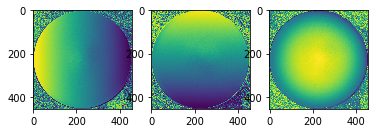

Original


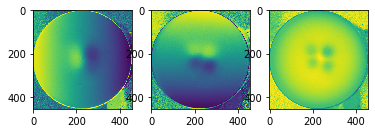

Normals:
Diffuse


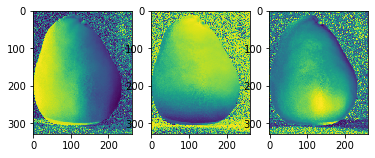

Original


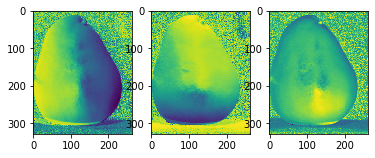

In [225]:
#Plot the normals for the sphere and pear for both the normal and diffuse components.
#1 : Load the different normals
# LOAD HERE
import pickle
f = open('normals.pkl','rb')
data = pickle.load(f)
v_sphere_diffuse = data[0]
v_sphere = data[1]
v_pear_diffuse = data[2]
v_pear = data[3]
print(v_sphere_diffuse.shape)
print(v_sphere_diffuse.max())
print(v_sphere_diffuse.min())

#2 : Plot the normals using plot_normals
#What do you observe? What are the differences between the diffuse component and the original images shown?
plot_normals(v_sphere_diffuse, v_sphere)
plot_normals(v_pear_diffuse, v_pear)
#PLOT HERE

### Part 2. Lambertian model [6 pts]

Fill in your implementation for the rendered image using the lambertian model.

In [296]:
def normalize(img):
    assert img.shape[2] == 3
    maxi = img.max()
    mini = img.min()
    return (img - mini)/(maxi-mini)

In [335]:
def lambertian(normals, lights, color, intensity, mask):
    '''Your implementation'''
    image = np.ones((normals.shape[0], normals.shape[1], 3))
    d1,d2,d3 = normals.shape
    lights = lights.T
    image = image.reshape((d1,d2,d3))
    for i in range(d1):
        for j in range(d2):
            lightDotnormal = float(np.dot(lights, np.transpose
                                     (np.array([normals[i][j]]))))
            image[i][j] = intensity*color.T*lightDotnormal
            image[i][j] = np.clip(image[i][j], 0, 99999)
            image[i][j] = image[i][j] * mask[i][j]
    image = normalize(image)
    return (image)

Plot the rendered results for both the sphere and the pear for both the original and the diffuse components. Remember to first load the masks from the masks.pkl file. The masks.pkl file is a list consisting of 2 numpy arrays-  
1)Mask for the sphere  
2)Mask for the pear  
Remember to plot the normalized image using the function normalize which is provided.

Spheres:
     Light Source1        Light Source2 
   diffuse   original    diffuse  original


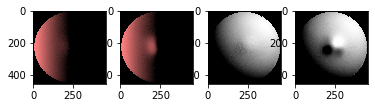

Pears:
     Light Source1        Light Source2 
   diffuse   original    diffuse  original


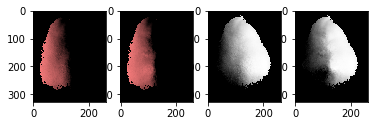

In [336]:
# Load the masks for the sphere and pear
# LOAD HERE
f = open('masks.pkl','rb')
masks = pickle.load(f)
mask_sphere = masks[0]
mask_pear = masks[1]
# Output the rendering results for Pear
dirn1 = np.array([[1.0],[0],[0]])
color1 = np.array([[1],[.5],[.5]])
dirn2 = np.array([[-1.0/3],[1.0/3],[1.0/3]])
color2 = np.array([[1],[1],[1]])

result_sphere_diffuse_s1 = lambertian(v_sphere_diffuse , 
                                dirn1, color1, 1, mask_sphere)
result_sphere_s1 = lambertian(v_sphere , dirn1, 
                            color1, 1, mask_sphere)
result_sphere_diffuse_s2 = lambertian(v_sphere_diffuse ,
                                dirn2, color2, 1, mask_sphere)
result_sphere_s2 = lambertian(v_sphere , dirn2, color2, 1, 
                              mask_sphere)
result_pear_diffuse_s1 = lambertian(v_pear_diffuse , dirn1, 
                                color1, 1, mask_pear)
result_pear_s1 = lambertian(v_pear , dirn1, color1, 1, 
                            mask_pear)
result_pear_diffuse_s2 = lambertian(v_pear_diffuse , dirn2, 
                                    color2, 1, mask_pear)
result_pear_s2 = lambertian(v_pear , dirn2, color2, 1, 
                            mask_pear)


#Display the rendering results for pear for both diffuse and for both the light sources
print("Spheres:")
print("     Light Source1        Light Source2 ")
print("   diffuse   original    diffuse  original")
# showing normals as three separate channels
figure = plt.figure()
ax1 = figure.add_subplot(141)
ax1.imshow(result_sphere_diffuse_s1)
ax2 = figure.add_subplot(142)
ax2.imshow(result_sphere_s1)
ax3 = figure.add_subplot(143)
ax3.imshow(result_sphere_diffuse_s2)
ax3 = figure.add_subplot(144)
ax3.imshow(result_sphere_s2)
plt.show()


print("Pears:")
print("     Light Source1        Light Source2 ")
print("   diffuse   original    diffuse  original")
# showing normals as three separate channels
figure = plt.figure()
ax1 = figure.add_subplot(141)
ax1.imshow(result_pear_diffuse_s1)
ax2 = figure.add_subplot(142)
ax2.imshow(result_pear_s1)
ax3 = figure.add_subplot(143)
ax3.imshow(result_pear_diffuse_s2)
ax3 = figure.add_subplot(144)
ax3.imshow(result_pear_s2)
plt.show()




### Part 3. Phong model [8 pts]

Please fill in your implementation for the Phong model below.

In [357]:
def phong(normals, lights, color, material, view, mask):
    '''Your implementation'''
    d1,d2,d3 = normals.shape
    image = np.ones((d1,d2,d3))
    ka = 0
    kd, ks, alpha = material
    n_lights = len(lights[0])
    lights = lights.T
    color = color.T
    
    for i in range(d1):
        for j in range(d2):
            pixel_pho = np.zeros((1,3))
            for m in range(n_lights):
                ambient = 0 * np.array([color[m]])
                lightDotNormal = float(np.dot(np.array([lights[m]]),
                                 np.transpose(np.array(normals[i][j]))))
                diffuse = kd * lightDotNormal * np.array([color[m]])
                Rm = 2*np.array([normals[i][j]]) * lightDotNormal
                - np.array([lights[m]])
                specular = ks * float(np.dot(Rm,view))**alpha 
                * np.array([color[m]])
                phong = ambient + diffuse + specular
                phong = np.clip(phong, 0, 99999)
                pixel_pho += phong
            image[i][j] = pixel_pho
            image[i][j] = image[i][j] * mask[i][j]
    #image = normalize(image)
    return (image)

With the function completed, plot the rendering results for the sphere and pear (both diffuse and original compnents) for all the materials and light sources and also with the combination of both the light sources.

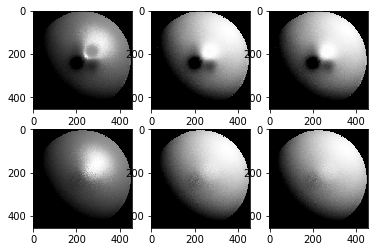

In [360]:
# Output the rendering results for sphere
f = open('masks.pkl','rb')
masks = pickle.load(f)
mask_sphere = masks[0]
mask_pear = masks[1]
view =  np.array([[0],[0],[1]])
material = np.array([[0.1,0.75,5],[0.5,0.1,5],[0.5,0.5,10]])
lightcol1 =  np.array([[-1.0/3,1],[1.0/3,1],[1.0/3,1]])
lightcol2 = np.array([[1,1],[0,0.5],[0,0.5]])

lightpos1 = np.array([[-1.0/3],[1.0/3],[1.0/3]])
lightpos2 = np.array([[1],[0],[0]])

color1 = np.array([[1],[1],[1]])
color2 = np.array([[1],[0.5],[0.5]])
 

#Display rendered results for sphere for all materials and light sources and combination of light sources

# Output the rendering results for sphere
#Light source 1, material 1 2 3, original/diffuse
pho_sphere_l1_m1 = phong(v_sphere, lightpos1, color1, material[0],
                         view, mask_sphere)
pho_sphere_diff_l1_m1 = phong(v_sphere_diffuse, lightpos1, color1,
                              material[0], view, mask_sphere)
pho_sphere_l1_m2 = phong(v_sphere, lightpos1, color1, material[1],
                         view, mask_sphere)
pho_sphere_diff_l1_m2 = phong(v_sphere_diffuse, lightpos1, color1, 
                              material[1], view, mask_sphere)
pho_sphere_l1_m3 = phong(v_sphere, lightpos1, color1, material[2],
                         view, mask_sphere)
pho_sphere_diff_l1_m3 = phong(v_sphere_diffuse, lightpos1, color1, 
                              material[2], view, mask_sphere)

sphere_l1_m1 = normalize(pho_sphere_l1_m1)
sphere_diff_l1_m1 = normalize(pho_sphere_diff_l1_m1)
sphere_l1_m2 = normalize(pho_sphere_l1_m2 )
sphere_diff_l1_m2 = normalize(pho_sphere_diff_l1_m2)
sphere_l1_m3 = normalize(pho_sphere_l1_m3)
sphere_diff_l1_m3 = normalize(pho_sphere_diff_l1_m3)
                              
figure = plt.figure()
ax1 = figure.add_subplot(231)
ax1.imshow(sphere_l1_m1)
ax2 = figure.add_subplot(232)
ax2.imshow(sphere_l1_m2)
ax3 = figure.add_subplot(233)
ax3.imshow(sphere_l1_m3)

ax4 = figure.add_subplot(234)
ax4.imshow(sphere_diff_l1_m1)
ax5 = figure.add_subplot(235)
ax5.imshow(sphere_diff_l1_m2)
ax6 = figure.add_subplot(236)
ax6.imshow(sphere_diff_l1_m3)
plt.show()

#### The images are the phong model of sphere with light source 1. The first row are the original images and the second row are the diffuse images. From left to right are material 1, 2, 3.

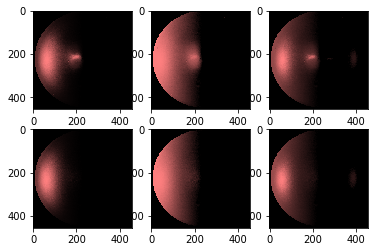

In [370]:
# Output the rendering results for sphere
#Light source 2, material 1 2 3, original/diffuse
pho_sphere_l2_m1 = phong(v_sphere, lightpos2, color2, material[0], 
                         view, mask_sphere)
pho_sphere_diff_l2_m1 = phong(v_sphere_diffuse, lightpos2, color2, 
                              material[0], view, mask_sphere)
pho_sphere_l2_m2 = phong(v_sphere, lightpos2, color2, material[1], 
                         view, mask_sphere)
pho_sphere_diff_l2_m2 = phong(v_sphere_diffuse, lightpos2, color2, 
                              material[1], view, mask_sphere)
pho_sphere_l2_m3 = phong(v_sphere, lightpos2, color2, material[2], 
                         view, mask_sphere)
pho_sphere_diff_l2_m3 = phong(v_sphere_diffuse, lightpos2, color2, 
                              material[2], view, mask_sphere)

sphere_l2_m1 = normalize(pho_sphere_l2_m1)
sphere_diff_l2_m1 = normalize(pho_sphere_diff_l2_m1)
sphere_l2_m2 = normalize(pho_sphere_l2_m2)
sphere_diff_l2_m2 = normalize(pho_sphere_diff_l2_m2)
sphere_l2_m3 = normalize(pho_sphere_l2_m3)
sphere_diff_l2_m3 = normalize(pho_sphere_diff_l2_m3)

figure = plt.figure()
ax1 = figure.add_subplot(231)
ax1.imshow(sphere_l2_m1)
ax2 = figure.add_subplot(232)
ax2.imshow(sphere_l2_m2)
ax3 = figure.add_subplot(233)
ax3.imshow(sphere_l2_m3)

ax4 = figure.add_subplot(234)
ax4.imshow(sphere_diff_l2_m1)
ax5 = figure.add_subplot(235)
ax5.imshow(sphere_diff_l2_m2)
ax6 = figure.add_subplot(236)
ax6.imshow(sphere_diff_l2_m3)
plt.show()

#### The images are the phong model of sphere with light source 2. The first row are the original images and the second row are the diffuse images. From left to right are material 1, 2, 3.

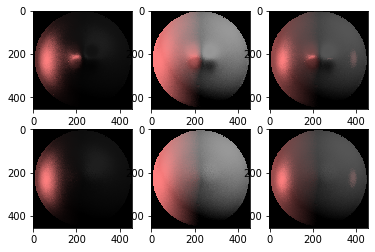

In [365]:
# Output the rendering results for sphere
#Combined Light source, material 1 2 3, original/diffuse
sphere_l12_m1 = normalize(pho_sphere_l1_m1 + pho_sphere_l2_m1)
sphere_diff_l12_m1 = normalize(pho_sphere_diff_l1_m1 + 
                               pho_sphere_diff_l2_m1)
sphere_l12_m2 = normalize(pho_sphere_l1_m2 + pho_sphere_l2_m2)
sphere_diff_l12_m2 = normalize(pho_sphere_diff_l1_m2 +
                               pho_sphere_diff_l2_m2)
sphere_l12_m3 = normalize(pho_sphere_l1_m3 + pho_sphere_l2_m3)
sphere_diff_l12_m3 = normalize(pho_sphere_diff_l1_m3 + 
                               pho_sphere_diff_l2_m3)

figure = plt.figure()
ax1 = figure.add_subplot(231)
ax1.imshow(sphere_l12_m1)
ax2 = figure.add_subplot(232)
ax2.imshow(sphere_l12_m2)
ax3 = figure.add_subplot(233)
ax3.imshow(sphere_l12_m3)

ax4 = figure.add_subplot(234)
ax4.imshow(sphere_diff_l12_m1)
ax5 = figure.add_subplot(235)
ax5.imshow(sphere_diff_l12_m2)
ax6 = figure.add_subplot(236)
ax6.imshow(sphere_diff_l12_m3)
plt.show()

#### The images are the phong model of sphere with combined light source. The first row are the original images and the second row are the diffuse images. From left to right are material 1, 2, 3.

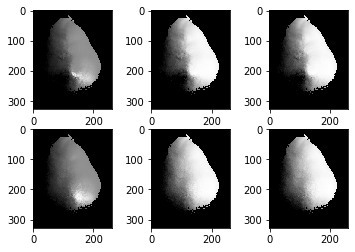

In [367]:
# Output the rendering results for pear
 
#Light source 1, material 1 2 3, original/diffuse
pho_pear_l1_m1 = phong(v_pear, lightpos1, color1, 
                       material[0], view, mask_pear)
pho_pear_diff_l1_m1 = phong(v_pear_diffuse, lightpos1,
                            color1, material[0], view, mask_pear)
pho_pear_l1_m2 = phong(v_pear, lightpos1, color1, 
                       material[1], view, mask_pear)
pho_pear_diff_l1_m2 = phong(v_pear_diffuse, lightpos1, color1, 
                            material[1], view, mask_pear)
pho_pear_l1_m3 = phong(v_pear, lightpos1, color1, material[2], 
                       view, mask_pear)
pho_pear_diff_l1_m3 = phong(v_pear_diffuse, lightpos1, color1, 
                            material[2], view, mask_pear)

pear_l1_m1 = normalize(pho_pear_l1_m1)
pear_diff_l1_m1 = normalize(pho_pear_diff_l1_m1)
pear_l1_m2 = normalize(pho_pear_l1_m2 )
pear_diff_l1_m2 = normalize(pho_pear_diff_l1_m2)
pear_l1_m3 = normalize(pho_pear_l1_m3)
pear_diff_l1_m3 = normalize(pho_pear_diff_l1_m3)
                              
figure = plt.figure()
ax1 = figure.add_subplot(231)
ax1.imshow(pear_l1_m1)
ax2 = figure.add_subplot(232)
ax2.imshow(pear_l1_m2)
ax3 = figure.add_subplot(233)
ax3.imshow(pear_l1_m3)

ax4 = figure.add_subplot(234)
ax4.imshow(pear_diff_l1_m1)
ax5 = figure.add_subplot(235)
ax5.imshow(pear_diff_l1_m2)
ax6 = figure.add_subplot(236)
ax6.imshow(pear_diff_l1_m3)
plt.show()

#### The images are the phong model of pear with light source 1. The first row are the original images and the second row are the diffuse images. From left to right are material 1, 2, 3.

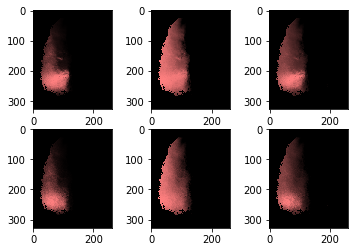

In [368]:
# Output the rendering results for pear
 
#Light source 2, material 1 2 3, original/diffuse
pho_pear_l2_m1 = phong(v_pear, lightpos2, color2, 
                       material[0], view, mask_pear)
pho_pear_diff_l2_m1 = phong(v_pear_diffuse, lightpos2,
                            color2, material[0], view, mask_pear)
pho_pear_l2_m2 = phong(v_pear, lightpos2, color2, 
                       material[1], view, mask_pear)
pho_pear_diff_l2_m2 = phong(v_pear_diffuse, lightpos2, 
                            color2, material[1], view, mask_pear)
pho_pear_l2_m3 = phong(v_pear, lightpos2, color2,
                       material[2], view, mask_pear)
pho_pear_diff_l2_m3 = phong(v_pear_diffuse, lightpos2, 
                            color2, material[2], view, mask_pear)

pear_l2_m1 = normalize(pho_pear_l2_m1)
pear_diff_l2_m1 = normalize(pho_pear_diff_l2_m1)
pear_l2_m2 = normalize(pho_pear_l2_m2 )
pear_diff_l2_m2 = normalize(pho_pear_diff_l2_m2)
pear_l2_m3 = normalize(pho_pear_l2_m3)
pear_diff_l2_m3 = normalize(pho_pear_diff_l2_m3)
                              
figure = plt.figure()
ax1 = figure.add_subplot(231)
ax1.imshow(pear_l2_m1)
ax2 = figure.add_subplot(232)
ax2.imshow(pear_l2_m2)
ax3 = figure.add_subplot(233)
ax3.imshow(pear_l2_m3)

ax4 = figure.add_subplot(234)
ax4.imshow(pear_diff_l2_m1)
ax5 = figure.add_subplot(235)
ax5.imshow(pear_diff_l2_m2)
ax6 = figure.add_subplot(236)
ax6.imshow(pear_diff_l2_m3)
plt.show()

#### The images are the phong model of pear with light source 2. The first row are the original images and the second row are the diffuse images. From left to right are material 1, 2, 3.

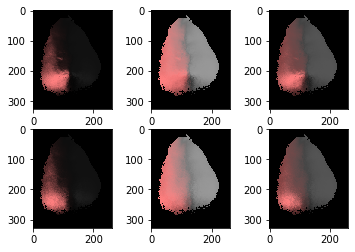

In [369]:
# Output the rendering results for pear
#Combined Light source, material 1 2 3, original/diffuse
pear_l12_m1 = normalize(pho_pear_l1_m1 + pho_pear_l2_m1)
pear_diff_l12_m1 = normalize(pho_pear_diff_l1_m1 + pho_pear_diff_l2_m1)
pear_l12_m2 = normalize(pho_pear_l1_m2 + pho_pear_l2_m2)
pear_diff_l12_m2 = normalize(pho_pear_diff_l1_m2 + pho_pear_diff_l2_m2)
pear_l12_m3 = normalize(pho_pear_l1_m3 + pho_pear_l2_m3)
pear_diff_l12_m3 = normalize(pho_pear_diff_l1_m3 + pho_pear_diff_l2_m3)

figure = plt.figure()
ax1 = figure.add_subplot(231)
ax1.imshow(pear_l12_m1)
ax2 = figure.add_subplot(232)
ax2.imshow(pear_l12_m2)
ax3 = figure.add_subplot(233)
ax3.imshow(pear_l12_m3)

ax4 = figure.add_subplot(234)
ax4.imshow(pear_diff_l12_m1)
ax5 = figure.add_subplot(235)
ax5.imshow(pear_diff_l12_m2)
ax6 = figure.add_subplot(236)
ax6.imshow(pear_diff_l12_m3)
plt.show()

#### The images are the phong model of pear with combined light source. The first row are the original images and the second row are the diffuse images. From left to right are material 1, 2, 3.